# Emotional Analysis the Deep Approach

**Introduction**

Brain computer interfaces in todays world are seen a was to extend the human experience and interaction with the world by offering a new pathway for information to flow out of the brain onto computing devices thus augmenting the minds physical capabilities. This is mostly motivated by the need to provide independence to the disabled. Researches ahave long been working on both fronts for the past two decades and have made valuable contributions in both the analytical software and the hardware for these systems. Recently new BCI devices have surfaced which try to bring this technology to real world application including the [Emotiv BCI headset](https://www.emotiv.com/the-science/), which offer a inexpensive option for users.

This cheaper hardware now allows for applications that can truelly affect individuals to be developed.

Also as of recent control tasks have become skewed towards self-autonomy it has become apparent that these systems could benefit from training these systems with the human context in mind [1](https://www.aaai.org/ocs/index.php/SSS/SSS14/paper/download/7725/7734). This is important as the autonomy should understand the decision making capabilities and other limitations of the humans in order to proactively provide the most relevant information given the user’s task or mission context. One area of interest for context in intent is the emotional state of the human intent. This 

**EEG Measurements**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
csv_path = "./recording/lucky_happy.csv"

# Step 1: Load the data
def load_neural_data(path=csv_path):
    '''Returns the pandas dataframe'''

    if os.path.exists(csv_path) == True:
        return pd.read_csv(csv_path)

    else:
        print("No file to read from")

emo_df = load_neural_data(csv_path)
emo_df


Y    X    F3    F4    P7   FC6    F7    F8    T7    P8   FC5   AF4  \
0     51  -11 -2707  6932  8014 -7597 -3723    40 -3397 -1262  6568 -3011   
1     51  -11 -2707  6932  8014 -7597 -3723    40 -3397 -1262  6568 -3011   
2   -104  146  5944 -5786  3832  5174 -8017  8052 -4886  2761  7457  6417   
3   -104  146  5944 -5786  3832  5174 -8017  8052 -4886  2761  7457  6417   
4    -69  -20 -6871  4348 -1657 -4805  -648 -2480  4783  4240  7607 -4892   
5    -69  -20 -6871  4348 -1657 -4805  -648 -2480  4783  4240  7607 -4892   
6     24  -80  6360 -6952  1878 -6528 -7983 -2423  1494 -7438  7249 -5561   
7     24  -80  6360 -6952  1878 -6528 -7983 -2423  1494 -7438  7249 -5561   
8    -61  -77  2581  2496  4263  5187  1976  5991  7458 -7962 -3061  2912   
9    -61  -77  2581  2496  4263  5187  1976  5991  7458 -7962 -3061  2912   
10   120   -2 -7660 -6904  2485  2000  1666  3886 -5795   -25  2671  1720   
11   120   -2 -7660 -6904  2485  2000  1666  3886 -5795   -25  2671  1720   
12    75  128   -51 -2476  4282 -4502 -5662   322  -488 -4223 -6853 -3472   
13    75  128   -51 -2476  4282 -4502 -5662   322  -488 -4223 -6853 -3472   
14   144 -101   623  2236  -729  4349 -5828  5434 -2724 -1296   949  3436   
15   144 -101   623  2236  -729  4349 -5828  5434 -2724 -1296   949  3436   
16   129   99  6883  6122  3399  6435  6008 -2325  1766  3779  3568  -589   
17   129   99  6883  6122  3399  6435  6008 -2325  1766  3779  3568  -589   
18   112   97   875 -7969   334  4167  4798  7728  1377  4842  6975 -4115   
19   112   97   875 -7969   334  4167  4798  7728  1377  4842  6975 -4115   
20    52   10  2406  1402  4833 -6555  1573    44  1696  5922  -805 -3756   
21    52   10  2406  1402  4833 -6555  1573    44  1696  5922  -805 -3756   
22    88  126  -545  7942  1926  6267 -6147 -2030 -4358   284  3782  8164   
23    88  126  -545  7942  1926  6267 -6147 -2030 -4358   284  3782  8164   
24   111  -75 -3269 -4636 -3122  5707 -3547 -6962 -7834  5741 -2045    71   
25   111  -75 -3269 -4636 -3122  5707 -3547 -6962 -7834  5741 -2045    71   
26   142  -32   212 -1170  6546 -1801 -4785 -4273 -4461 -3985  -940 -4662   
27    22  139   807 -3302  6976 -5809 -2122  1066 -3605 -4180 -2714  2867   
28    22  139   807 -3302  6976 -5809 -2122  1066 -3605 -4180 -2714  2867   
29   -45  -82  -451 -2791  7879  7105  6906 -1244 -4456  2955 -2780 -2885   
..   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
386   32   49 -7251 -6588 -5024  1181 -7280  1514   -57  5291 -1439 -4633   
387   97  148  2478  6390   988  4106 -4048  -368 -6437 -6122  2256 -7251   
388   97  148  2478  6390   988  4106 -4048  -368 -6437 -6122  2256 -7251   
389   55  -92 -3527  8133  7361  1421 -5887 -1948  3813  4505  7879 -1022   
390   55  -92 -3527  8133  7361  1421 -5887 -1948  3813  4505  7879 -1022   
391  103  -48 -8017  2321 -6796 -6288 -4536   222  8141  7965 -5224 -6058   
392  103  -48 -8017  2321 -6796 -6288 -4536   222  8141  7965 -5224 -6058   
393   93  131  3816 -2691  1760   623  1752  8176 -7017  3284 -7578  7834   
394   93  131  3816 -2691  1760   623  1752  8176 -7017  3284 -7578  7834   
395  122  -91 -5039 -2522  3173 -6860  -777 -8052  3972 -3370  3237 -6954   
396  122  -91 -5039 -2522  3173 -6860  -777 -8052  3972 -3370  3237 -6954   
397  149  145 -4703 -1015   -73  2156 -1682 -3710  5635 -5914   687  7528   
398  149  145 -4703 -1015   -73  2156 -1682 -3710  5635 -5914   687  7528   
399   -7  -23     5  3616  -759  5710  2016  -247  5319  3347 -1460  -145   
400   -7  -23     5  3616  -759  5710  2016  -247  5319  3347 -1460  -145   
401  -20   -1 -2216  5224 -2691 -6848 -1444  1619 -2403 -5291 -4288  5136   
402  -20   -1 -2216  5224 -2691 -6848 -1444  1619 -2403 -5291 -4288  5136   
403 -103  -82 -6960  8138  6338 -3195  6166  6785 -5571  6437 -7070  -668   
404 -103  -82 -6960  8138  6338 -3195  6166  6785 -5571  6437 -7070  -668   
405  -57  141 -3794  -771  4788 -2277 -4066 -3479  6885 -6668  -139 -6085   
406

416
[[-2707  6932  8014 ...,  3476 -1249 -1476]
 [-2707  6932  8014 ...,  3476 -1249 -1476]
 [ 5944 -5786  3832 ..., -5068 -6879 -3195]
 ..., 
 [-6083  6818  5069 ...,  4920 -6867  6579]
 [-6083  6818  5069 ...,  4920 -6867  6579]
 [ 3173 -4077  5942 ...,  2564  6923 -1074]]
['Y', 'X', 'F3', 'F4', 'P7', 'FC6', 'F7', 'F8', 'T7', 'P8', 'FC5', 'AF4', 'T8', '02', '01', 'AF3', 'state']
(14, 416)


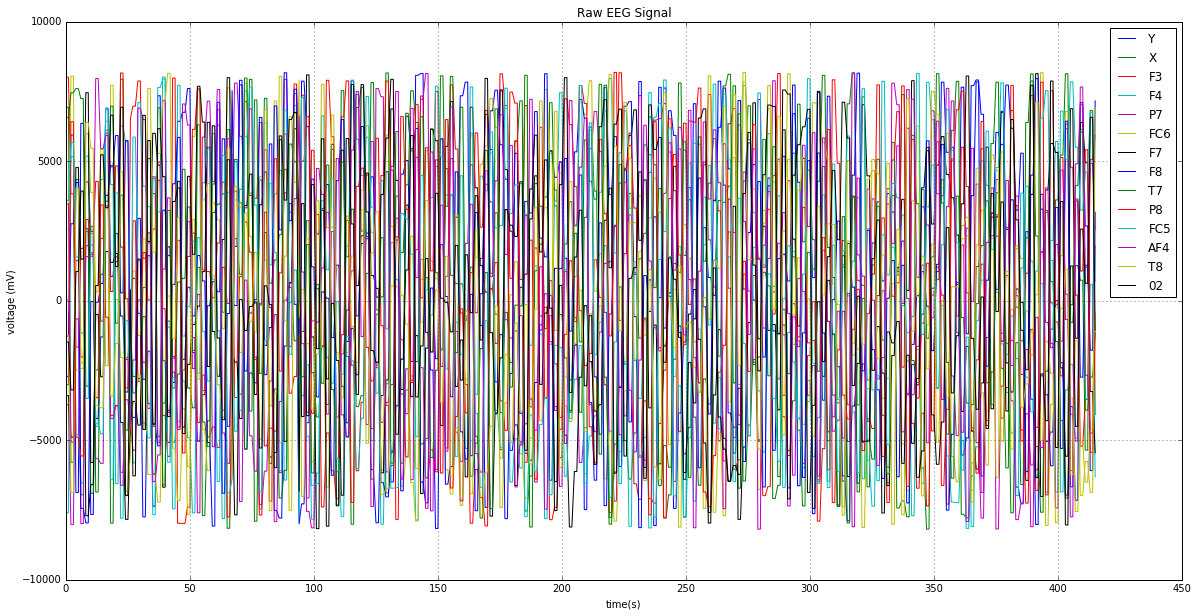

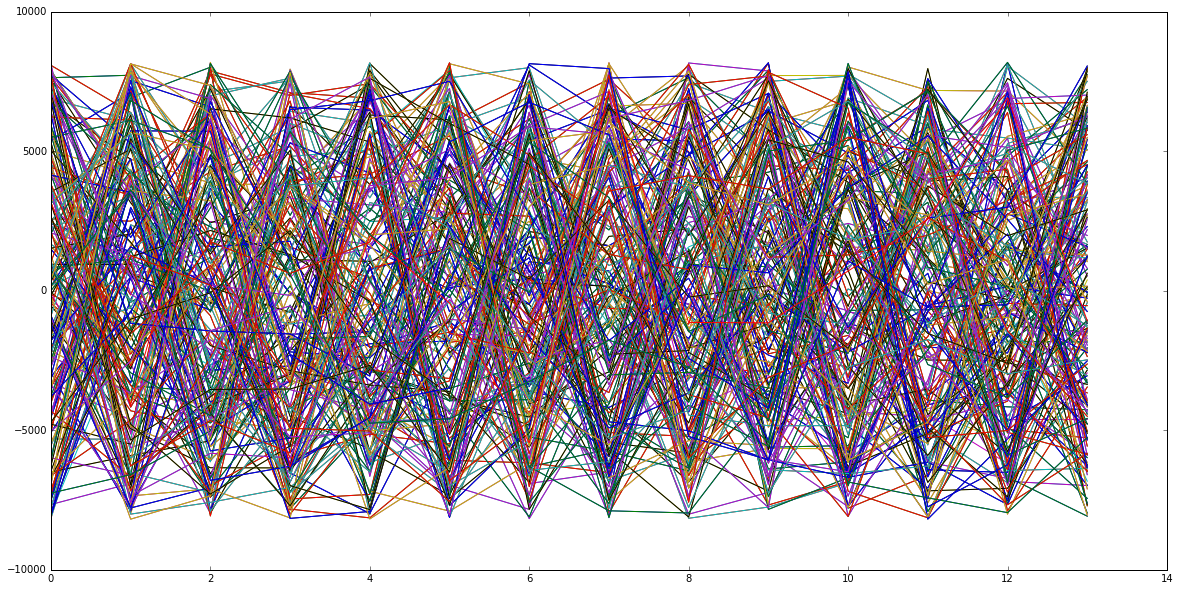

In [16]:
instances = emo_df.shape[0]

# set the sensor values
x = emo_df.ix[:,2:-1].values
y = emo_df['state']
size = y.shape[0]
print size

# encode the text labels to allow for math opeartions
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


#reshape the class size for tensor operations
#y = y.reshape(size, 1)
print x
# align each sensor per row
x = x.T
labels = list(emo_df)
print labels
# extract the table labels
print x.shape
t = np.arange(0.0, instances, 1)
#t = np.arange(0.0, instances, 1)
fig, ax = plt.subplots(figsize=(20,10))
for i in x:
    ax.plot(i)
    ax.hold('on')
    
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(x)

ax.set(xlabel='time(s)', ylabel='voltage (mV)',
       title='Raw EEG Signal')

ax.legend(labels[:-1])

ax.grid()

plt.show()

**Preprocessing**

EEg signals carry with them noise signals. these noise signals are from things like power line  inteferences or other electronic amplifiers (external interferences) and also artifacts (signals originating from anyhere other than the cerebral region of the brain) like Ocular EoG, Muscular EMG and Vascular ECG. These artifacts are the results of muscles reactions in the body like eye blinkin, the movement of the head, shoulders legs and fingers. all these contibute to the unwanted signals in the EEG channels. Artifacts liike eye movements and jaw clenching can be removed using cross-hair fixation point [(2)](Thaler, L., Schütz, A., Goodale, M. and Gegenfurtner, K. 2013 What is the best fixation target? The effect of target shape on stability of fixational eye movements. Vision Research, 76, pp.31-42.). Which maitains the concentration and gaze of the particpant during recordings.

In [17]:
cA = []
cD = []
ts_rec = []
import pywt
for i in x:
    ca, cd = pywt.dwt(i, 'db4')
    cA.append(ca); cD.append(cd)

cat = pywt.thresholding.soft(cA, np.std(cA)/2)
cdt = pywt.thresholding.soft(cD, np.std(cD)/2)

for i, j in zip(cat, cdt):
    ts = pywt.idwt(i, j, 'db4')
    ts_rec.append(ts)

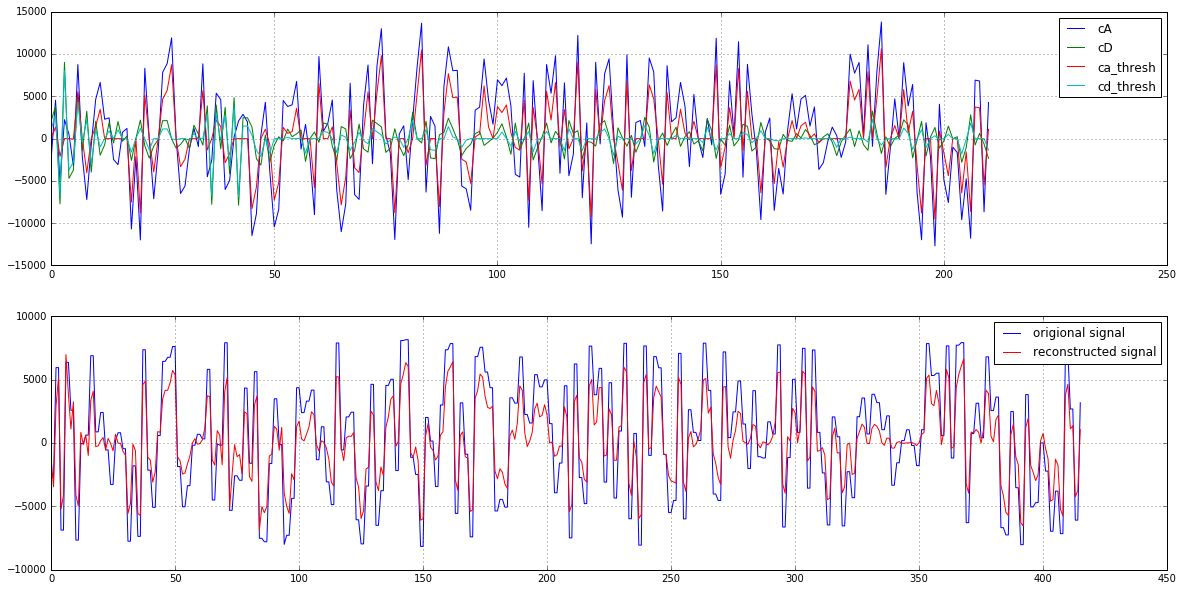

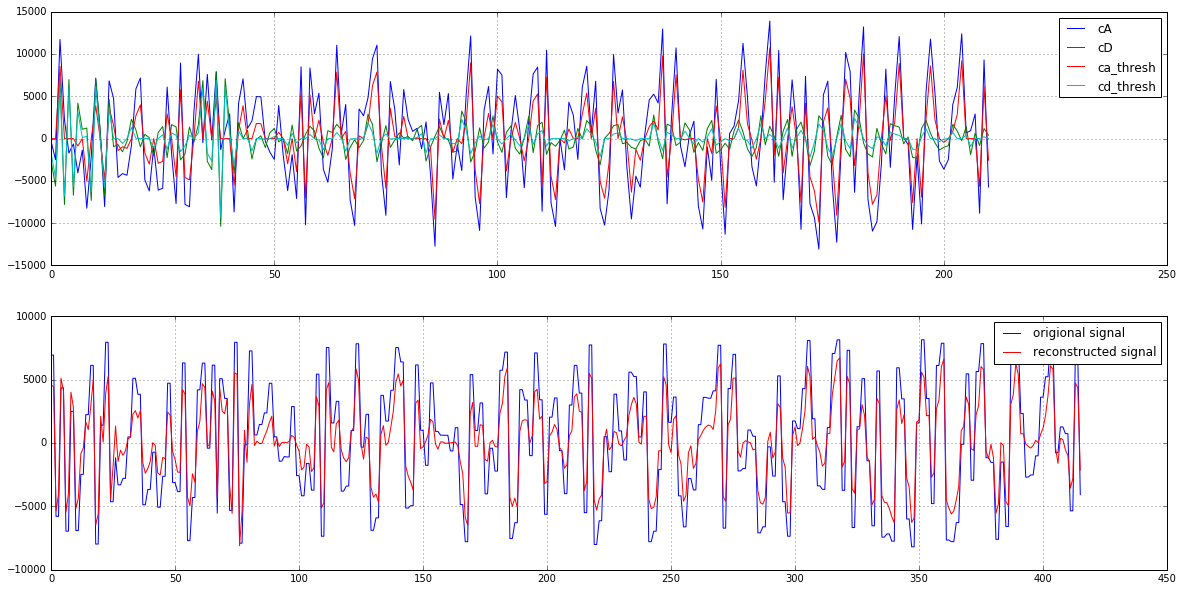

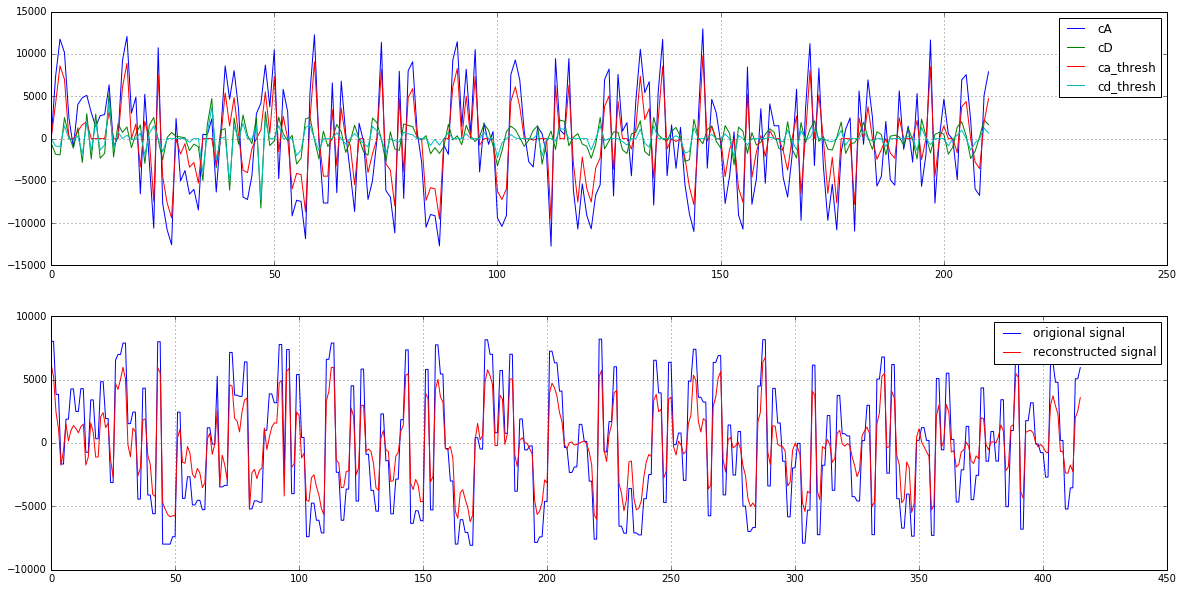

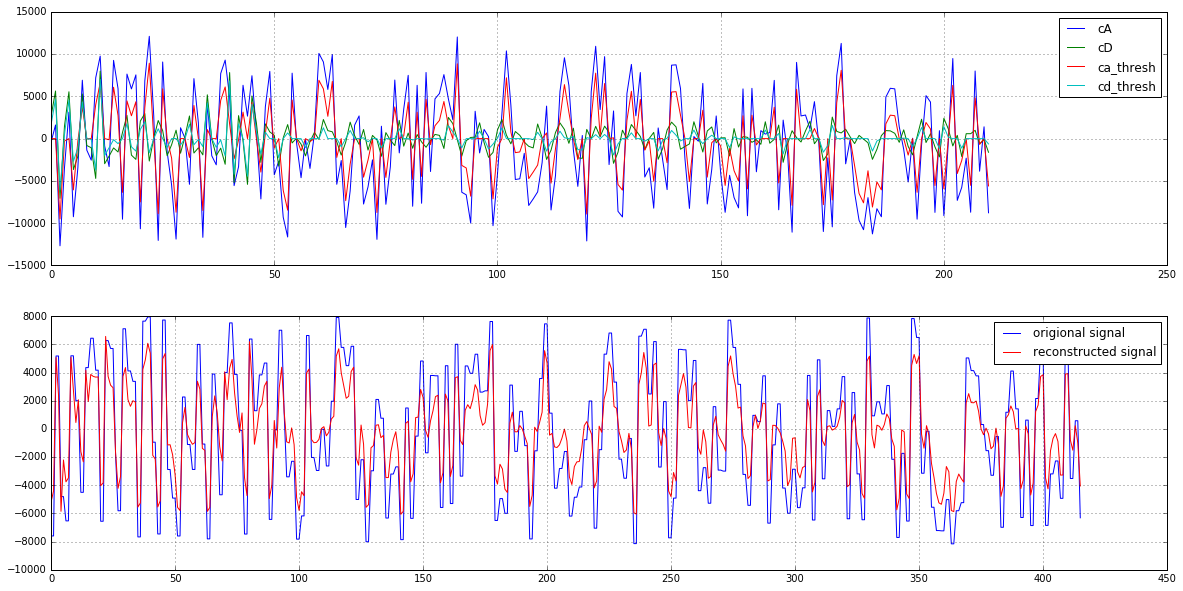

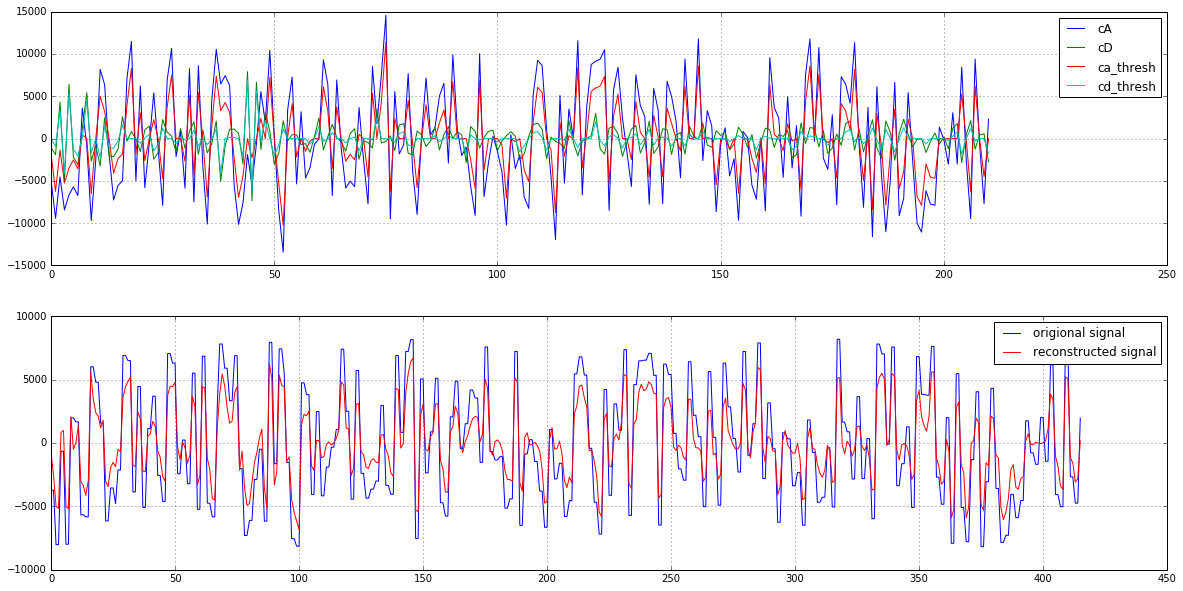

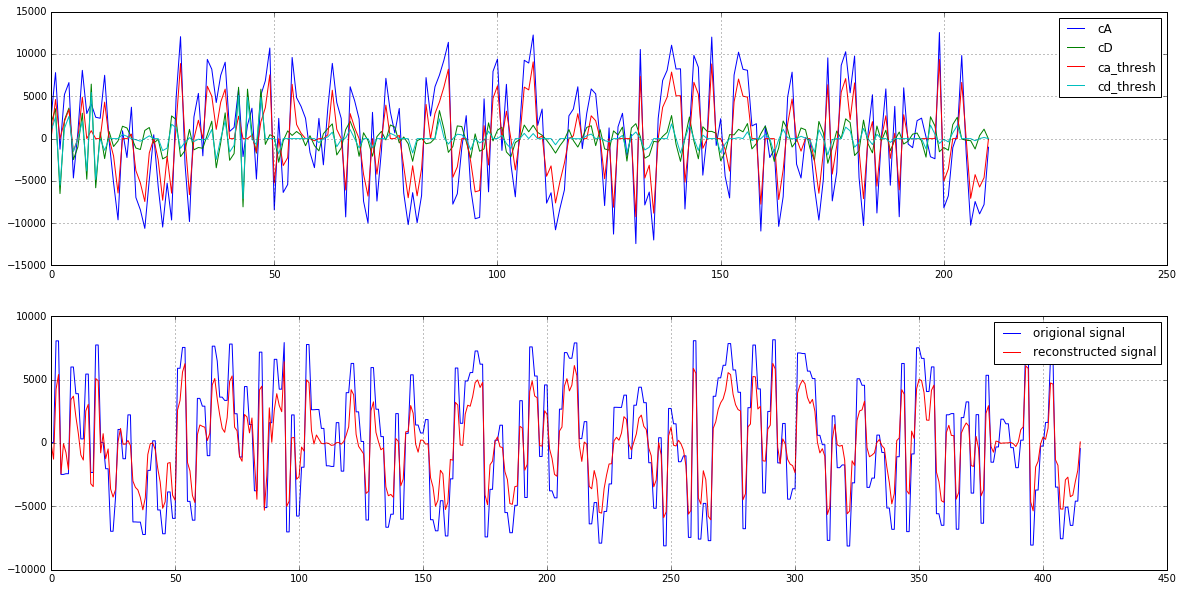

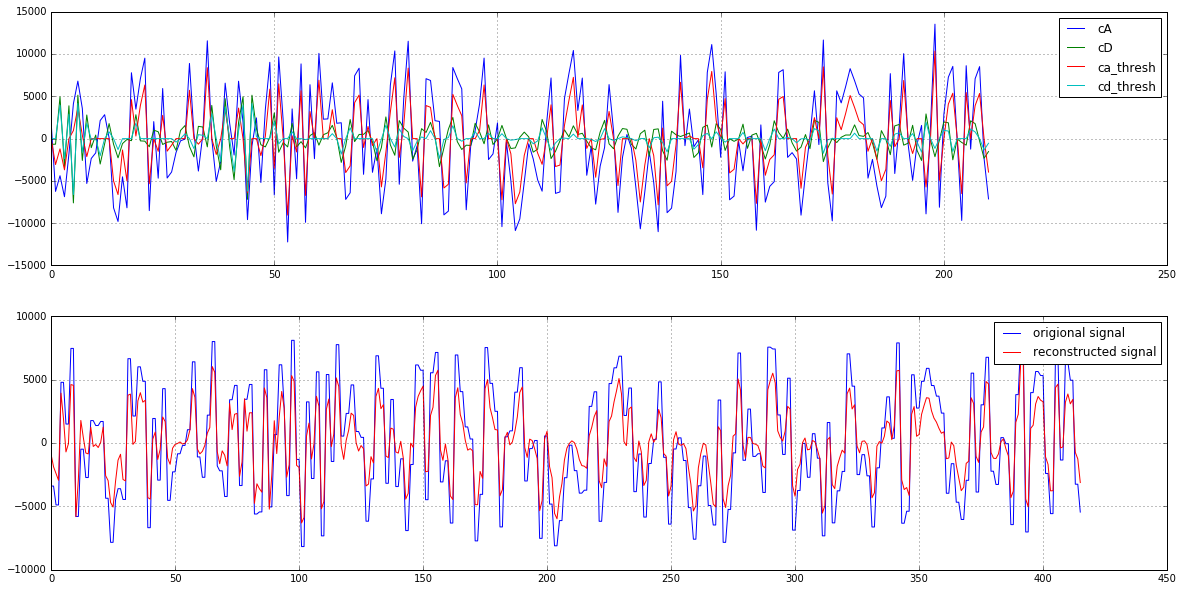

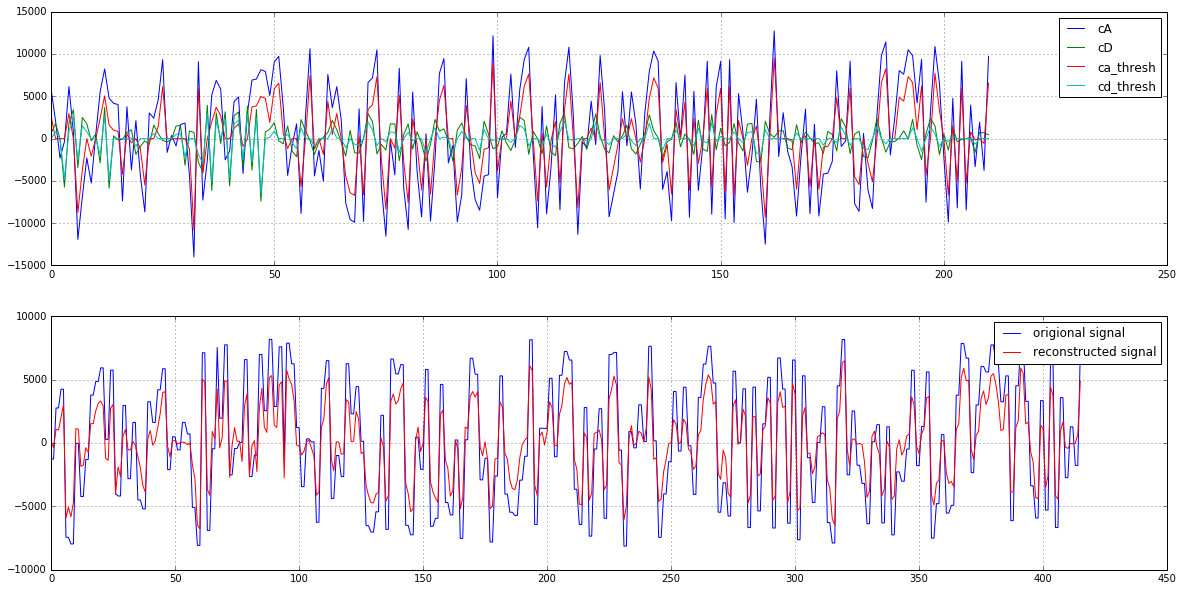

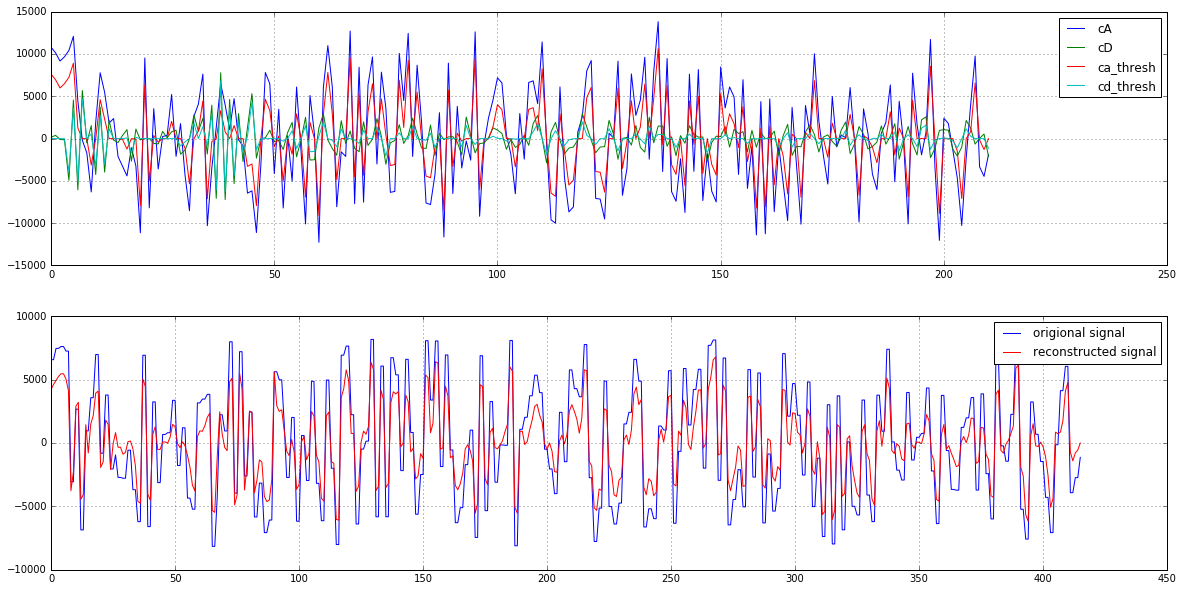

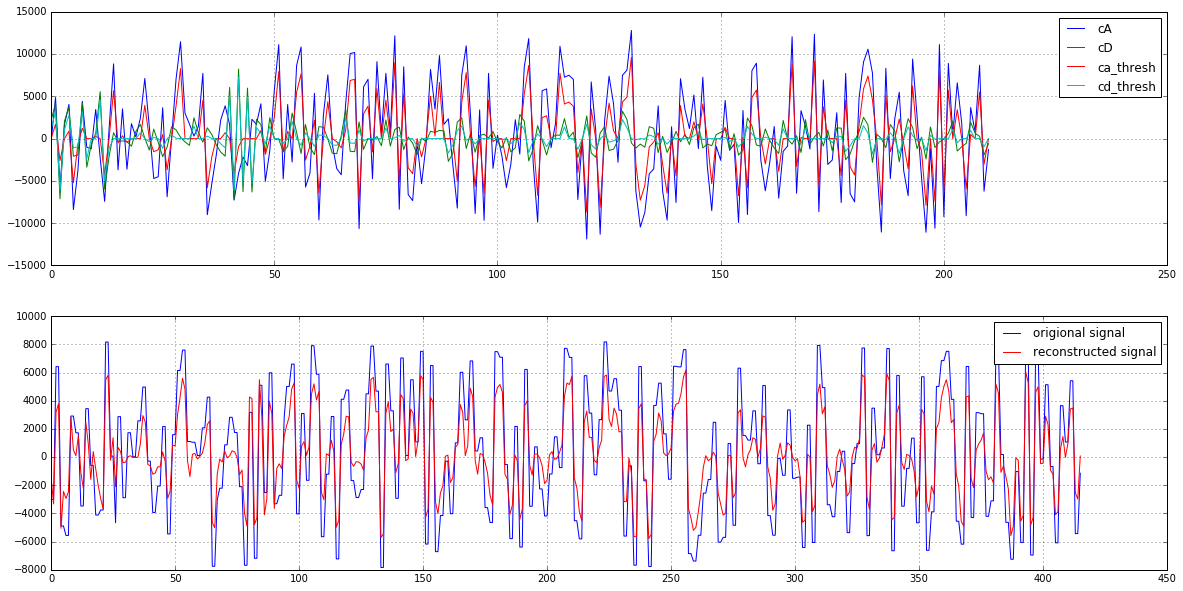

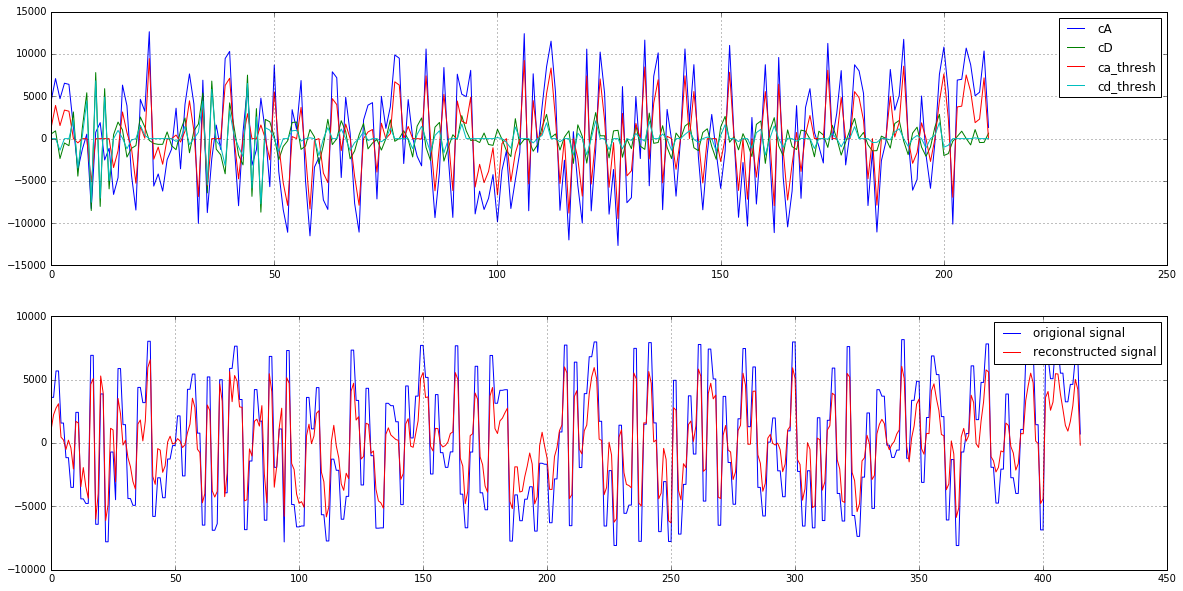

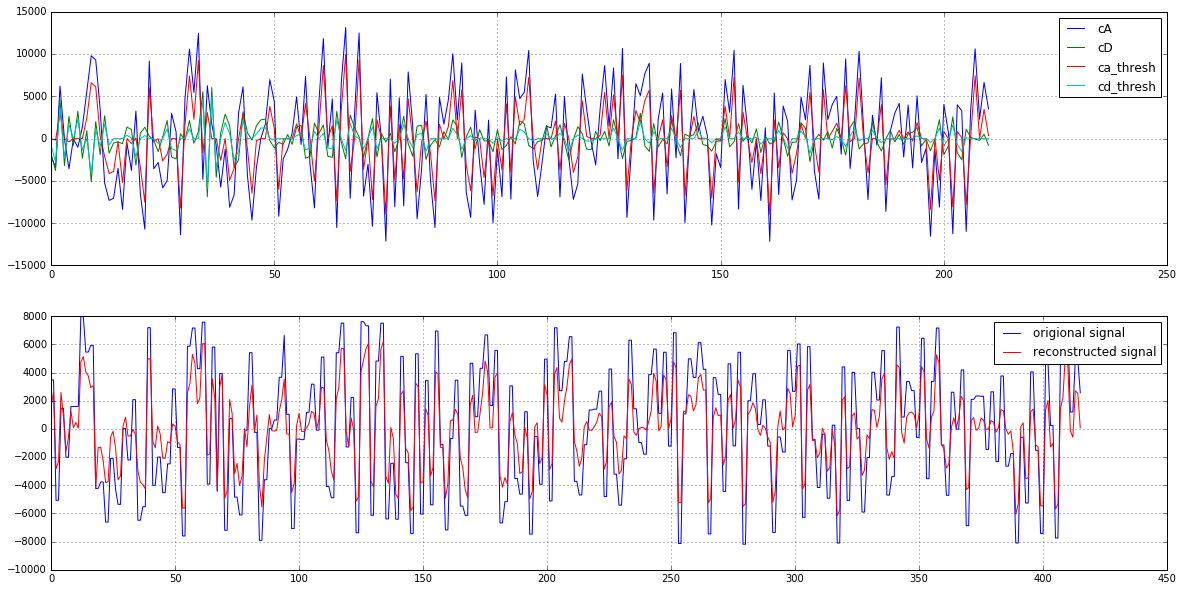

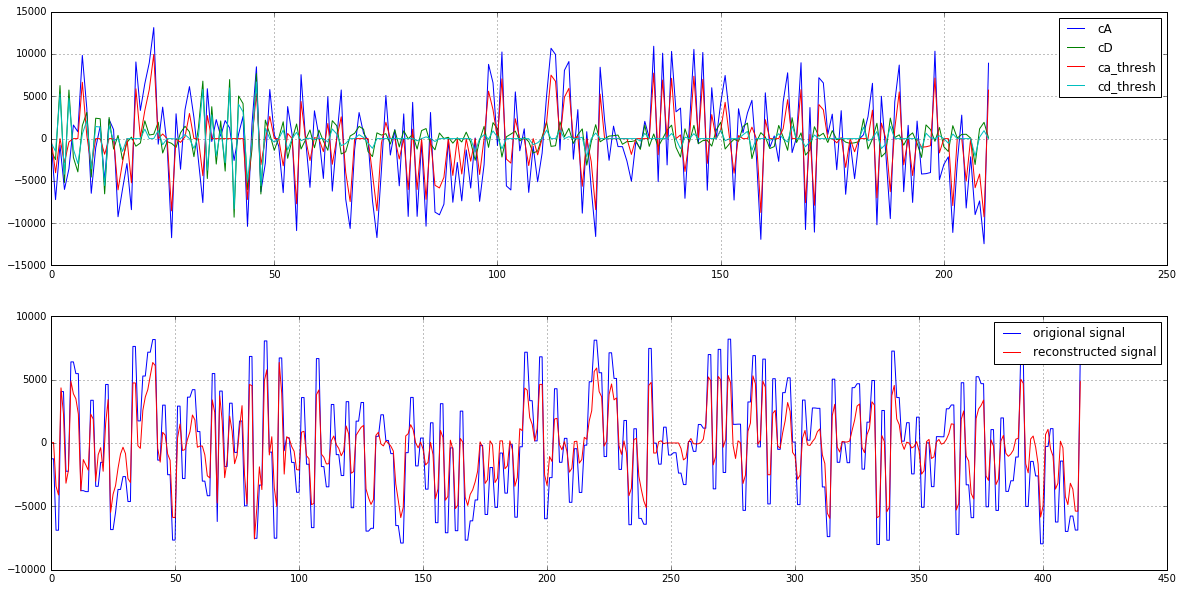

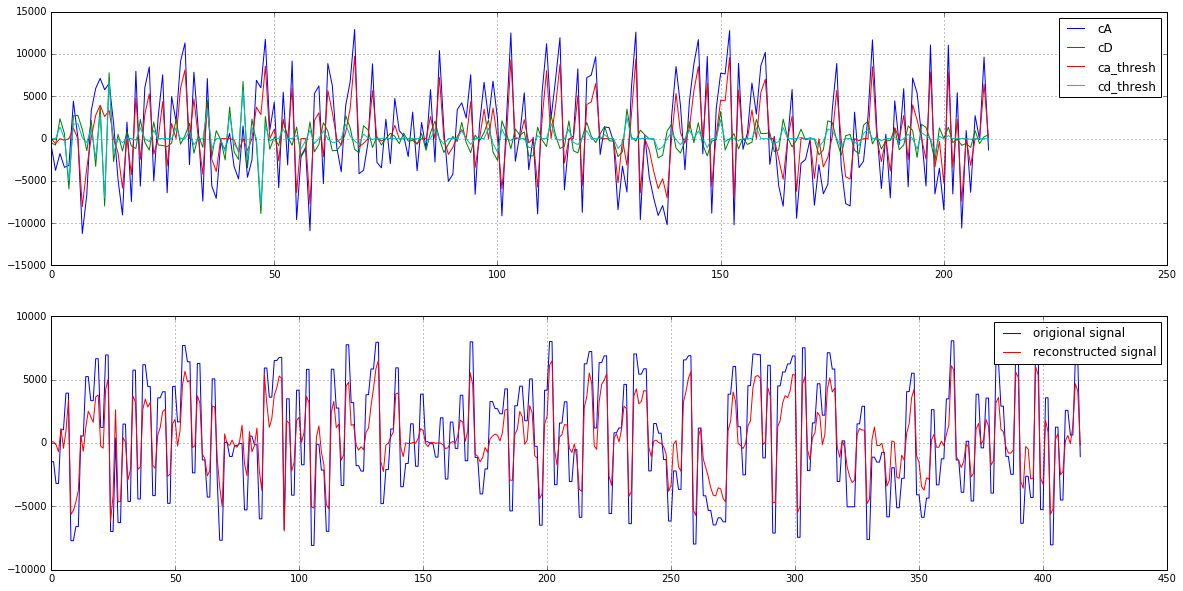

In [18]:
plt.close('all')
for i in range(14):
    plt.subplots(figsize=(20,10))
    
    plt.subplot(211)
    # Origional coefficients        
    plt.plot(cA[i])
    plt.plot(cD[i])
    # Thresholded coefficient
    plt.plot(cat[i])
    plt.plot(cdt[i])
    plt.legend(['cA', 'cD', 'ca_thresh', 'cd_thresh'], loc=0)
    plt.grid('on')
    
    plt.subplot(212)
    plt.plot(x[i])
    plt.hold('on')
    plt.plot(ts_rec[i], 'r')
    plt.legend(['origional signal', 'reconstructed signal'])
    plt.grid('on')
    plt.show()

In [19]:
# one hot ecode the labels
label_seq = np.unique(y)

onehot_encoded = list()
for value in y:
    label_ = [0 for _ in range(len(label_seq))]
    label_[value] = 1
    onehot_encoded.append(label_)

y_ = np.asarray(onehot_encoded)
labels = np.asmatrix(y_)

In [20]:
from sklearn.cross_validation import train_test_split
import tensorflow as tf
signal_df = pd.DataFrame(
    {
    'F3': ts_rec[0],
    'F4': ts_rec[1],
    'P7': ts_rec[2],
    'FC6': ts_rec[3],
    'F7': ts_rec[4],
    'F8': ts_rec[5],
    'T7': ts_rec[6],
    'P8': ts_rec[7],
    'FC5': ts_rec[8],
    'AF4': ts_rec[9],
    'T8': ts_rec[10],
    '02': ts_rec[11],
    '01': ts_rec[12],
    'AF3': ts_rec[13]})

sig_matr = signal_df.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(sig_matr, labels, test_size=0.25, random_state=0)

print sig_matr

[[   12.53116223  1591.32411742    98.86633833 ...,   115.86758745
   -894.51481113  1014.78845199]
 [   35.40163291  2608.04315789    81.76254873 ...,  -371.48653538
  -1882.07590417  2221.7780025 ]
 [-3411.79487649 -2841.04785633  -143.41482231 ...,  1095.26400009
  -2418.66149072  2755.92008117]
 ..., 
 [-5367.06983262  2708.56890704  4672.4423058  ...,   -18.93379188
   -742.33373736  5013.99198159]
 [-5384.18509835  2514.89804418  4078.48264504 ...,   675.31033258
  -1254.15955328  4227.40022179]
 [ 4839.75494453    74.82007641  -180.90790481 ...,  4848.59224316
  -3119.92579611  -170.6123716 ]]


In [32]:
# Data Processing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit only to the training data
scaler.fit(X_train)
# now for transforming the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
tf.reset_default_graph()

learning_rate = 0.01
training_iteration = 30
batch_size = 10
display_step = 2

x = tf.placeholder(tf.float32, [None, 14]) # siganl data with shape 1*16
y = tf.placeholder(tf.float32, [None, 2]) # the 2 emotional states

# create a model

# Set the model weights
W = tf.Variable(tf.zeros([14, 2])) # weigths of the liniear model
b = tf.Variable(tf.zeros([2])) # bias of the linear model

with tf.name_scope("Wx_b") as scope:
    # Constuct a linear model
    model = tf.nn.softmax(tf.matmul(x, W) + b) # the softmax 
    
# Summary opps to collect the data
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

# more namescopes to clean up graph representation
with tf.name_scope("cost_function") as scope:
    # Minimize error using cross entropy
    #cross entropy
    cost_function = -tf. reduce_sum(y*tf.log(model))
    # Create a summary to monitor the cost function
    tf.summary.scalar("cost_function", cost_function)
    
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
    
# inintalizing the variables
init = tf.global_variables_initializer()

# Merge all summaries into a single opearator
merged_summary_op = tf.summary.merge_all()

sess = tf.Session() #create a session
sess.run(init) # Initialize the variables
with tf.Session() as sess:
    sess.run(init)
    
    # set the logs writer to the folder /tmp/tensorflow-logs
    summary_writer = tf.summary.FileWriter('data/logs')

    # Training cycle
    for iteration in range(training_iteration):
        avg_cost = 0.
        total_batch = int(X_train.shape[0]/batch_size)
        # initialize slice parameters for batching
        start = 0
        end = batch_size-1
        ## loop over all the batches
        for i in range(total_batch):
            batch_xs = X_train[start:end]
            batch_ys = y_train[start:end]
            # fit training using the batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute the average loss
            avg_cost += sess.run(cost_function, feed_dict={x: batch_xs, y: batch_ys})/total_batch
            # write logs for each iteartion
            summary_str = sess.run(merged_summary_op, feed_dict={x: batch_xs, y: batch_ys})
            summary_writer.add_summary(summary_str, iteration*total_batch + i)

            # update the slice params
            start += 10
            end += 10
        # Display logs per iteration step
        if iteration % display_step == 0:
            print "iteration", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(avg_cost)

    print "Tuning complete"

    # Test the model
    predictions = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(predictions, tf.float32))
    print "Accuracy:", accuracy.eval({x: X_test, y: y_test})

iteration 0001 cost= 3.891428847
iteration 0003 cost= 2.559982757
iteration 0005 cost= 2.436940757
iteration 0007 cost= 2.404221516
iteration 0009 cost= 2.392582686
iteration 0011 cost= 2.387924769
iteration 0013 cost= 2.385979504
iteration 0015 cost= 2.385175092
iteration 0017 cost= 2.384867097
iteration 0019 cost= 2.384774969
iteration 0021 cost= 2.384772709
iteration 0023 cost= 2.384803496
iteration 0025 cost= 2.384842475
iteration 0027 cost= 2.384879542
iteration 0029 cost= 2.384910865
Tuning complete
Accuracy: 0.807692


In [28]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 14]) # placeholder for the input layer
W = tf.Variable(tf.zeros([14, 2])) # The wrights of the linear layer
b = tf.Variable(tf.zeros([2])) # bias of the linear layer

init = tf.global_variables_initializer()

# model
Y = tf.nn.softmax(tf.matmul(X, W) + b) # Compute the model predictions

# Placeholder for corrrect answers
Y_ = tf.placeholder(tf.float32, [None, 2])

# loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y)) 

# % of correct answers found in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) # Is the model's prediction correct?
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # compute teh average accuracy

optimizer = tf.train.GradientDescentOptimizer(0.003) #learning rate
train_step = optimizer.minimize(cross_entropy)

sess = tf.Session() #create a session
sess.run(init) # Initialize the variables


avg_train_cost = 0. 
avg_train_accuracy = 0.
avg_test_cost = 0.
avg_test_accuracy = 0.


# initialize slice parameters for batching
start = 0
end = batch_size-1
num_steps = size/batch_size   # How many training steps do we want?
for i in range(num_steps):
    # load of batch of images and correct answers
    batch_X = X_train[start:end]
    batch_Y = y_train[start:end] # get a batch of signal instances
    train_data = {X:batch_X, Y_:batch_Y}
    # train
    sess.run(train_step, feed_dict=train_data) # Run the training
    
    # sucess ?
    a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    
    
    
    if i % 10 == 0:
        print "Step", i, "Current train cost and accuracy: ", c, a
    
    avg_train_cost += c
    avg_train_accuracy += a
    # update the slice params
    start += 10
    end += 10
    
print("Completed Training")

avg_train_cost /= num_steps
avg_train_accuracy /= num_steps

print("Average train cost: ", avg_train_cost)
print("Average train accuracy: ", avg_train_accuracy)

# How well did we do on the test data?
test_data = {X:X_test, Y_:y_test}
a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)

print("Test cost: ", c)
print("Test accuracy: ", a)

Step 0 Current train cost and accuracy:  5.95823 1.0
Step 10 Current train cost and accuracy:  5.23409 0.888889
Step 20 Current train cost and accuracy:  4.74484 0.888889
Step 30 Current train cost and accuracy:  4.46916 0.888889
Step 40 Current train cost and accuracy:  -0.0 nan
Completed Training
('Average train cost: ', 3.9218415908697173)
('Average train accuracy: ', nan)
('Test cost: ', 57.561699)
('Test accuracy: ', 0.81730771)


In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,2),max_iter=500)

In [31]:

mlp.fit(X_train, y_train)

score = mlp.score(X_test, y_test)
print("score:" + str(score))

score:0.817307692308
